# Imports

In [254]:
from keras.models import load_model
import locale
from matplotlib.ticker import ScalarFormatter
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

In [255]:
locale.setlocale(locale.LC_ALL, 'pt_BR.UTF-8') 

'pt_BR.UTF-8'

# Model load

In [256]:
path_qing_cheng = '../model/qing_cheng'
path_vallen = '../model/vallen'

qing_cheng_model_name = 'QingCheng'
vallen_model_name = 'Vallen'

In [257]:
def get_file_paths(path: str):
    file_paths = []

    for dir_path, _, file_names in os.walk(path):
        file_path = {}
        
        for file_name in file_names:
            
            if file_name.endswith('.h5'):
                file_path['model'] = os.path.join(dir_path, file_name)
                
            elif file_name.endswith('x.npy'):
                file_path['x'] = os.path.join(dir_path, file_name)
                
            elif file_name.endswith('y.npy'):
                file_path['y'] = os.path.join(dir_path, file_name)
                
        if len(file_path) > 0:
            file_paths.append(file_path)

    return file_paths

In [258]:
paths_qing_cheng = get_file_paths(path_qing_cheng)
paths_vallen = get_file_paths(path_vallen)

In [259]:
def load_model_result(path_dict: dict):
    model = load_model(path_dict['model'])
    x = np.load(path_dict['x'])
    y = np.load(path_dict['y'])
    
    y_predicted = model.predict(x)
    y_predicted_classes = np.argmax(y_predicted, axis=1)
    
    return {
        'model': model, 
        'x': x, 
        'y': y, 
        'y_predicted': y_predicted, 
        'y_predicted_classes': y_predicted_classes,
    }

In [260]:
qing_cheng_models = [load_model_result(path) for path in paths_qing_cheng]
vallen_models = [load_model_result(path) for path in paths_vallen]

282/282 [==============================] - 2s 6ms/step


# Plot

In [261]:
position_class_label = ['Normalidade', 'Vazamento na posição 2', 'Vazamento na posição 3', 'Vazamento na posição 4']
boolean_class_label = ['Normalidade', 'Vazamento']

In [289]:
def plot_confusion_matrix(model_a:dict, model_a_name: str, model_b:dict, model_b_name:str, class_labels: list[str], rotation:bool = False):
    matrix_a = confusion_matrix(model_a['y'], model_a['y_predicted_classes'])
    matrix_b = confusion_matrix(model_b['y'], model_b['y_predicted_classes'])
    
    matrix_a_percent = matrix_a / matrix_a.sum(axis=1)[:, np.newaxis]
    matrix_b_percent = matrix_b / matrix_b.sum(axis=1)[:, np.newaxis]
    
    matrix_a_df = pd.DataFrame(matrix_a_percent, columns=class_labels, index=class_labels)
    matrix_b_df = pd.DataFrame(matrix_b_percent, columns=class_labels, index=class_labels)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    
    heatmap_a = sns.heatmap(matrix_a_df, annot=True, cmap='Blues', fmt='.2%', cbar=False, square=True, linewidths=0.5, ax=ax1, annot_kws={"size": 12})
    heatmap_b = sns.heatmap(matrix_b_df, annot=True, cmap='Blues', fmt='.2%', cbar=False, square=True, linewidths=0.5, ax=ax2, annot_kws={"size": 12})
    
    for text in heatmap_a.texts:
        text.set_text(text.get_text().replace('.', ','))
        
    for text in heatmap_b.texts:
        text.set_text(text.get_text().replace('.', ','))
    
    ax1.tick_params(axis='both', labelsize=13)
    ax2.tick_params(axis='both', labelsize=13)
    
    if rotation:
        heatmap_a.set_xticklabels(heatmap_a.get_xticklabels(), rotation=45, ha='right')
        heatmap_b.set_xticklabels(heatmap_b.get_xticklabels(), rotation=45, ha='right')
    
    ax1.set_title(f'{model_a_name}', size=16)
    ax2.set_title(f'{model_b_name}', size=16)
    
    plt.tight_layout()
    plt.show()

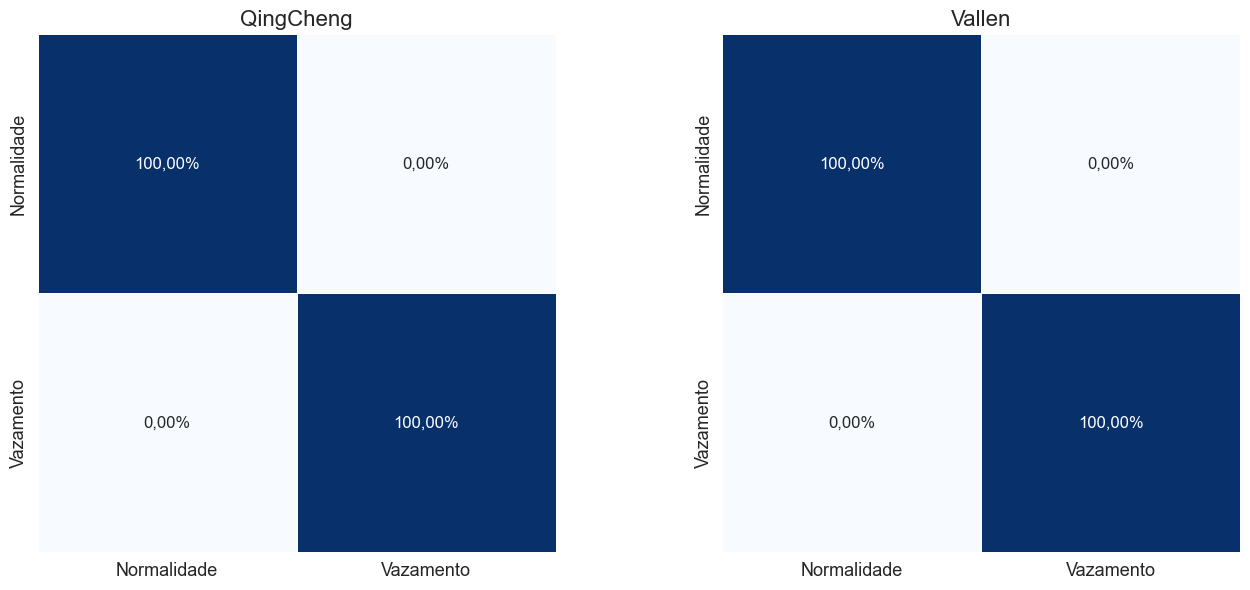

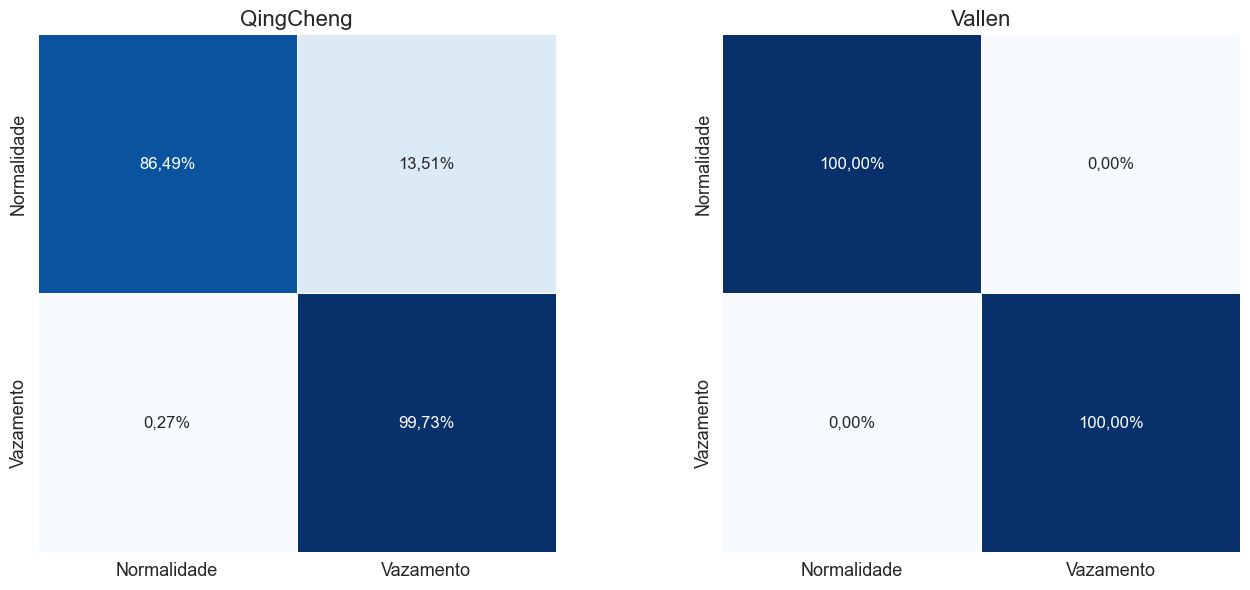

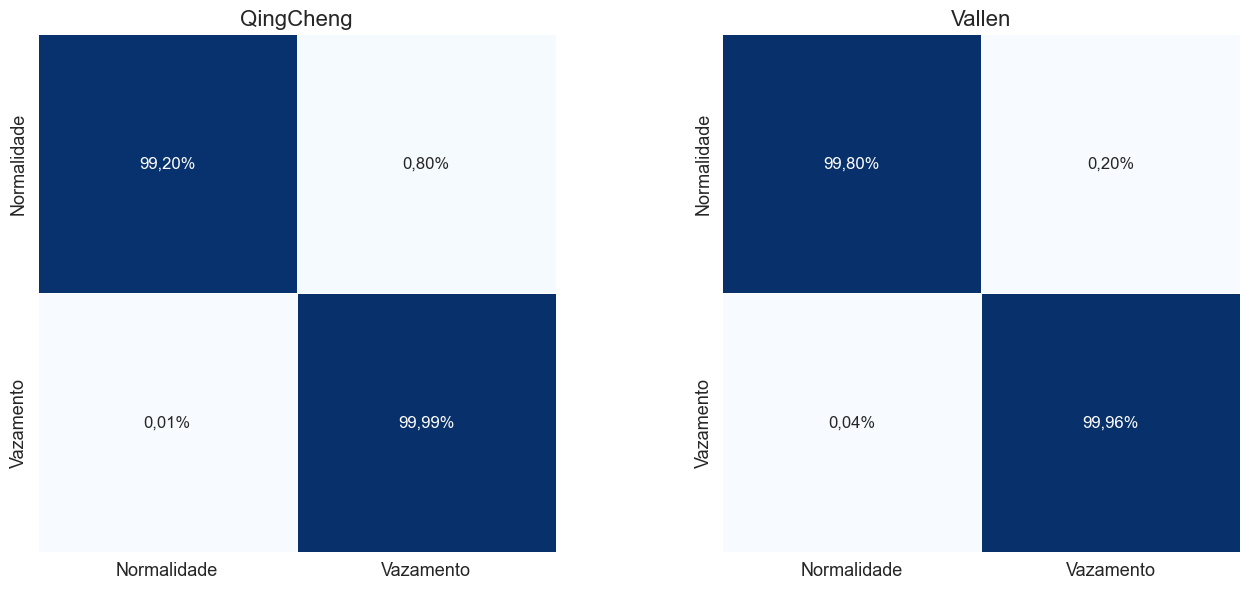

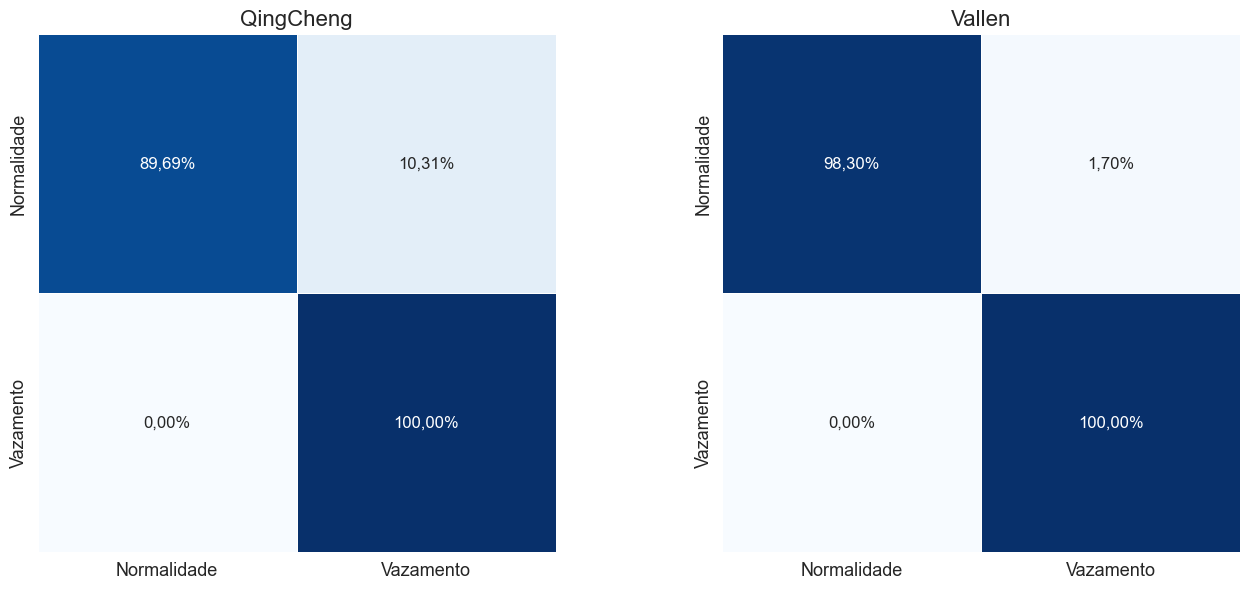

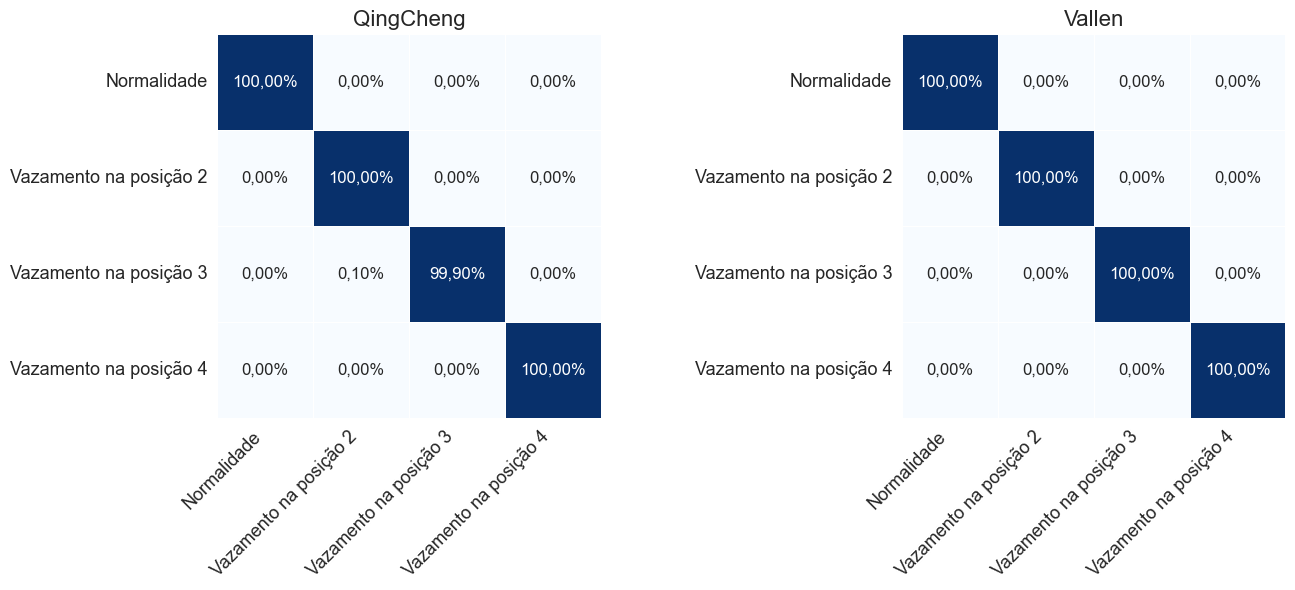

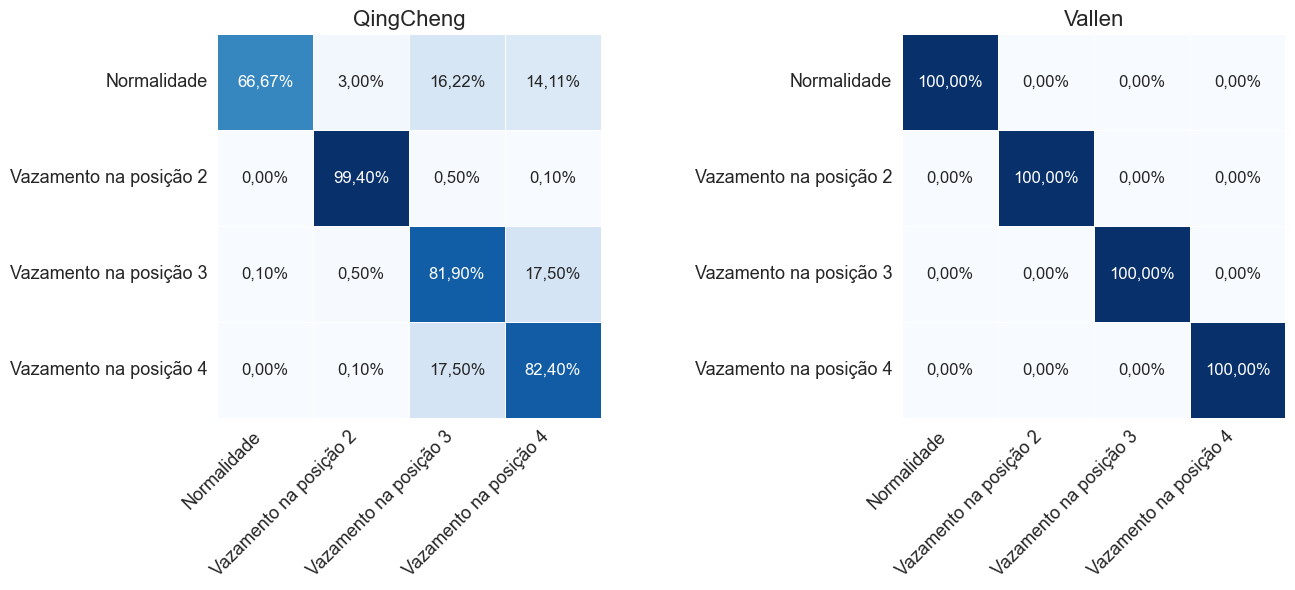

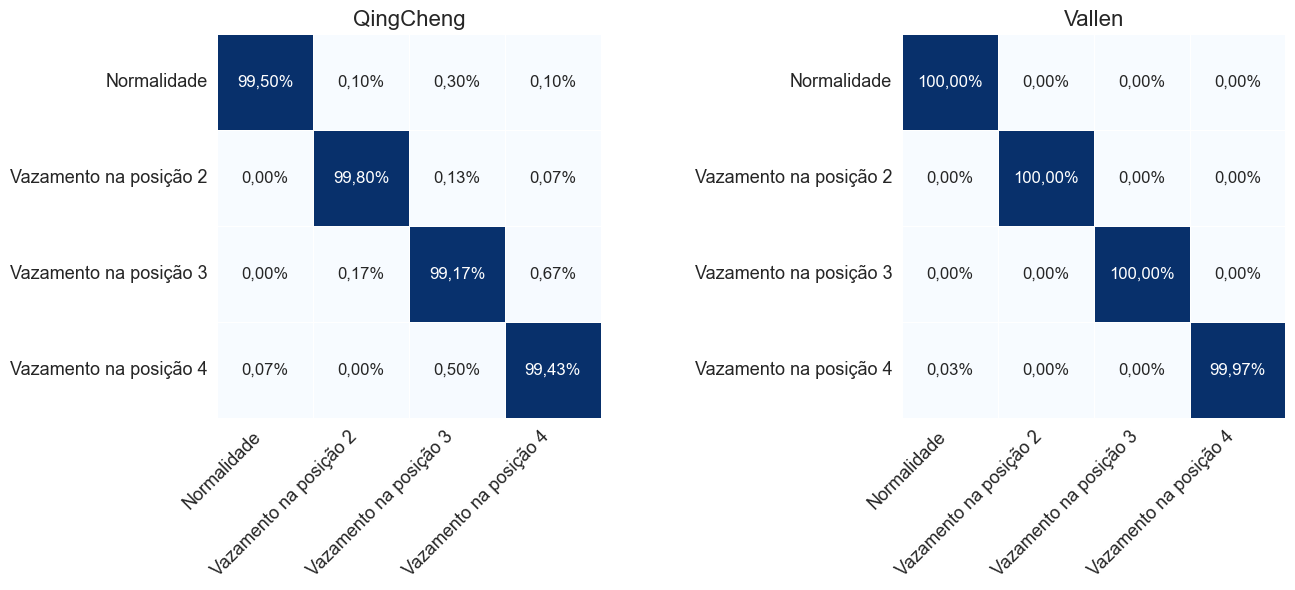

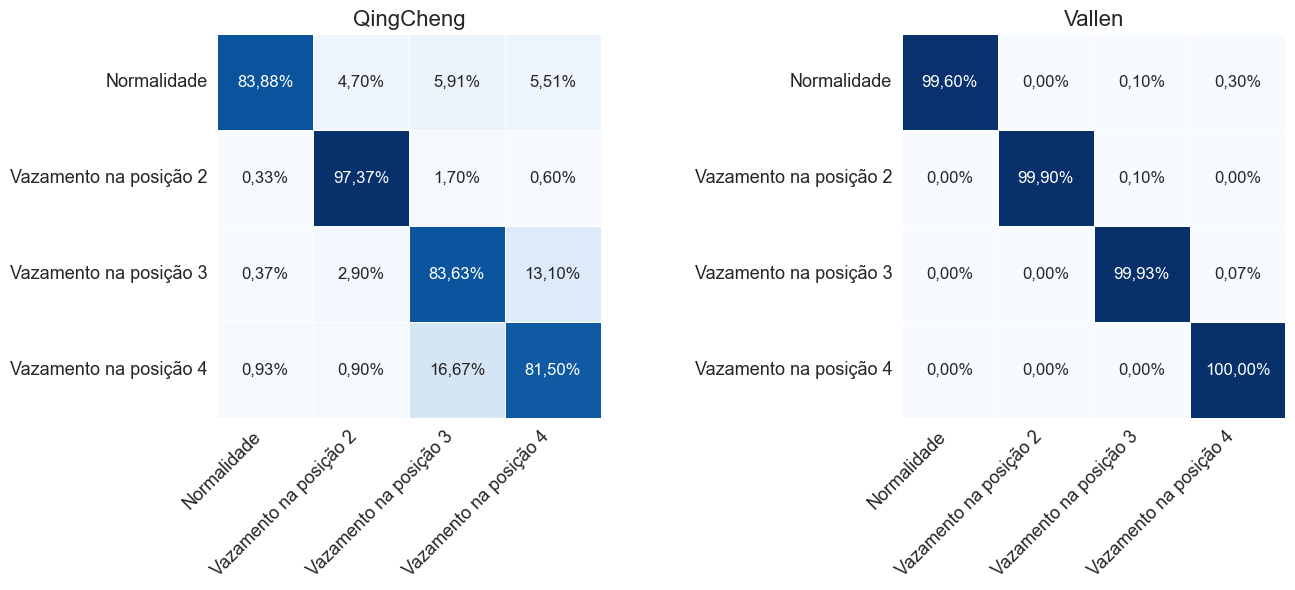

In [290]:
for index in range(len(qing_cheng_models)):
    if index < 4:
        plot_confusion_matrix(
            qing_cheng_models[index], 
            qing_cheng_model_name, 
            vallen_models[index], 
            vallen_model_name, 
            boolean_class_label
        )
    
    else:
        plot_confusion_matrix(
            qing_cheng_models[index], 
            qing_cheng_model_name, 
            vallen_models[index], 
            vallen_model_name, 
            position_class_label,
            True
        )